In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [300]:
df=pd.read_csv("Heart Failure Prediction Dataset.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [301]:
df.shape

(918, 12)

In [302]:
df.size

11016

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [304]:
df.duplicated().sum()

0

In [305]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [306]:
df_num_col=df.select_dtypes(include="number").columns
df_cat_col=df.select_dtypes(include="object").columns
df_cat_col

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [307]:
df_cat_unique={}
for i in df[df_cat_col]:
  value=df[i].unique()
  df_cat_unique[i]=value

df_cat_uni=pd.DataFrame(dict([(k,pd.Series(v)) for k,v in df_cat_unique.items()]))
df_cat_uni


,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,ST,Y,Flat
2,NaN,ASY,LVH,NaN,Down
3,NaN,TA,NaN,NaN,NaN


In [308]:
df_copy=df
df_copy.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [309]:
from sklearn.preprocessing import OrdinalEncoder
categories=[["ASY","NAP","ATA","TA"],["Normal","ST","LVH"],["Down","Flat","Up"]]
oe1=OrdinalEncoder(categories=categories,dtype=int)
df[['ChestPainType', 'RestingECG','ST_Slope']]=oe1.fit_transform(df[['ChestPainType', 'RestingECG','ST_Slope']])
df.head()
df.shape

(918, 12)

In [310]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
df_o=(ohe.fit_transform(df[["Sex","ExerciseAngina"]])).toarray()
feature_name=ohe.get_feature_names_out(["Sex","ExerciseAngina"])
df_ohe=pd.DataFrame(df_o,columns=feature_name)
df_ohe.head()
df_ohe.shape

(918, 4)

In [311]:
df=pd.concat([df,df_ohe],axis=1)
df.drop(["Sex","ExerciseAngina","Sex_F","ExerciseAngina_N"],axis=1,inplace=True)
df.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_M,ExerciseAngina_Y
0,40,2,140,289,0,0,172,0.0,2,0,1.0,0.0
1,49,1,160,180,0,0,156,1.0,1,1,0.0,0.0
2,37,2,130,283,0,1,98,0.0,2,0,1.0,0.0
3,48,0,138,214,0,0,108,1.5,1,1,0.0,1.0
4,54,1,150,195,0,0,122,0.0,2,0,1.0,0.0


In [312]:
df.shape

(918, 12)

<Axes: >

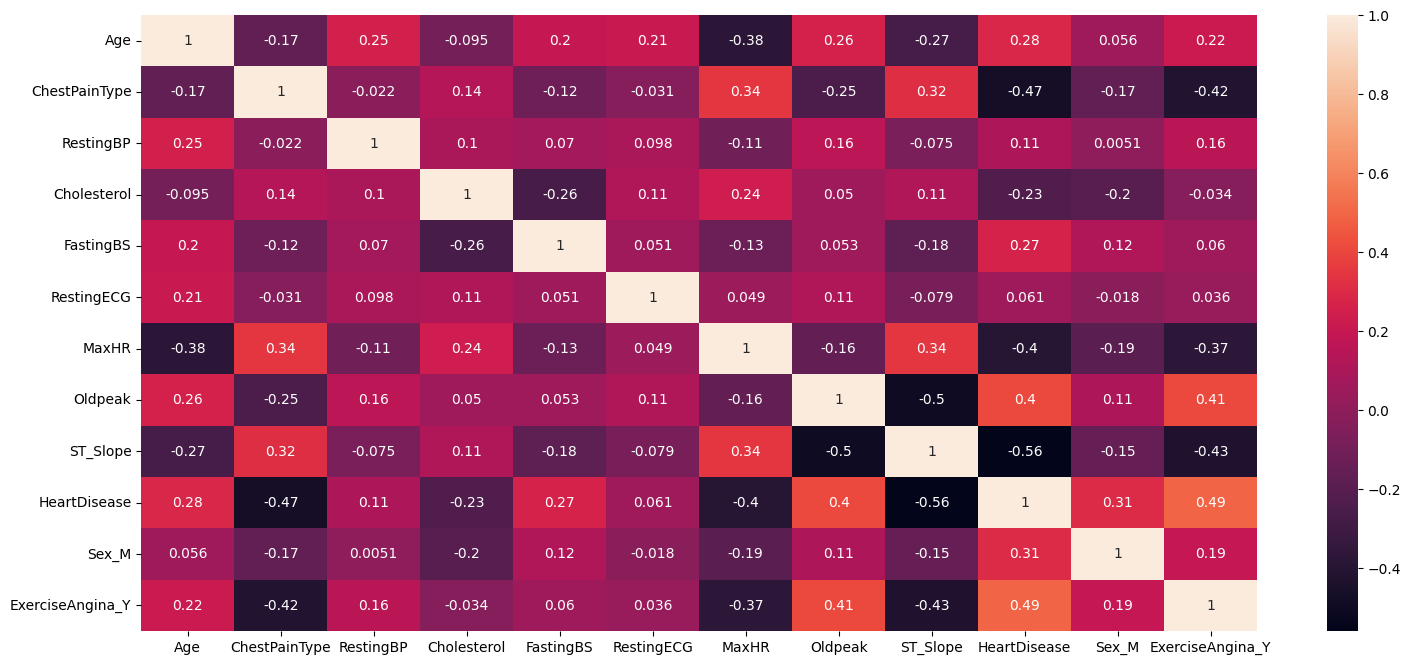

In [313]:
cor=df.corr()
plt.figure(figsize=(18,8))
sns.heatmap(cor,annot=True)

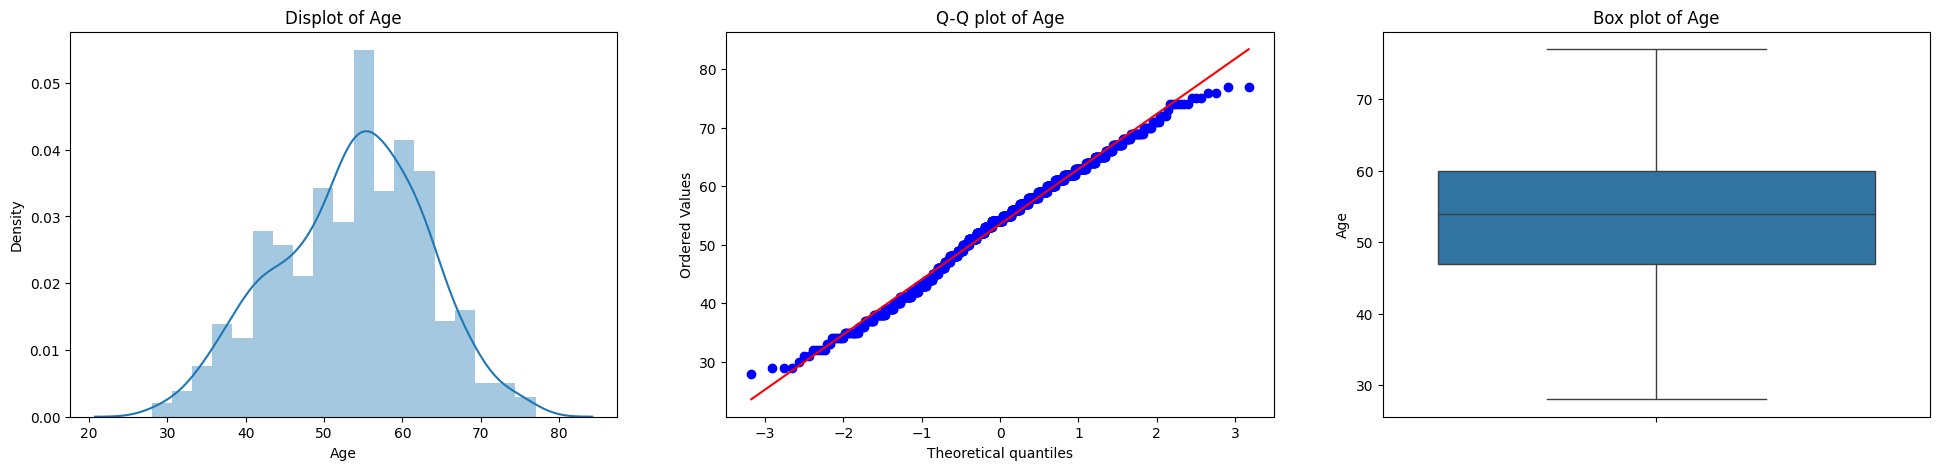

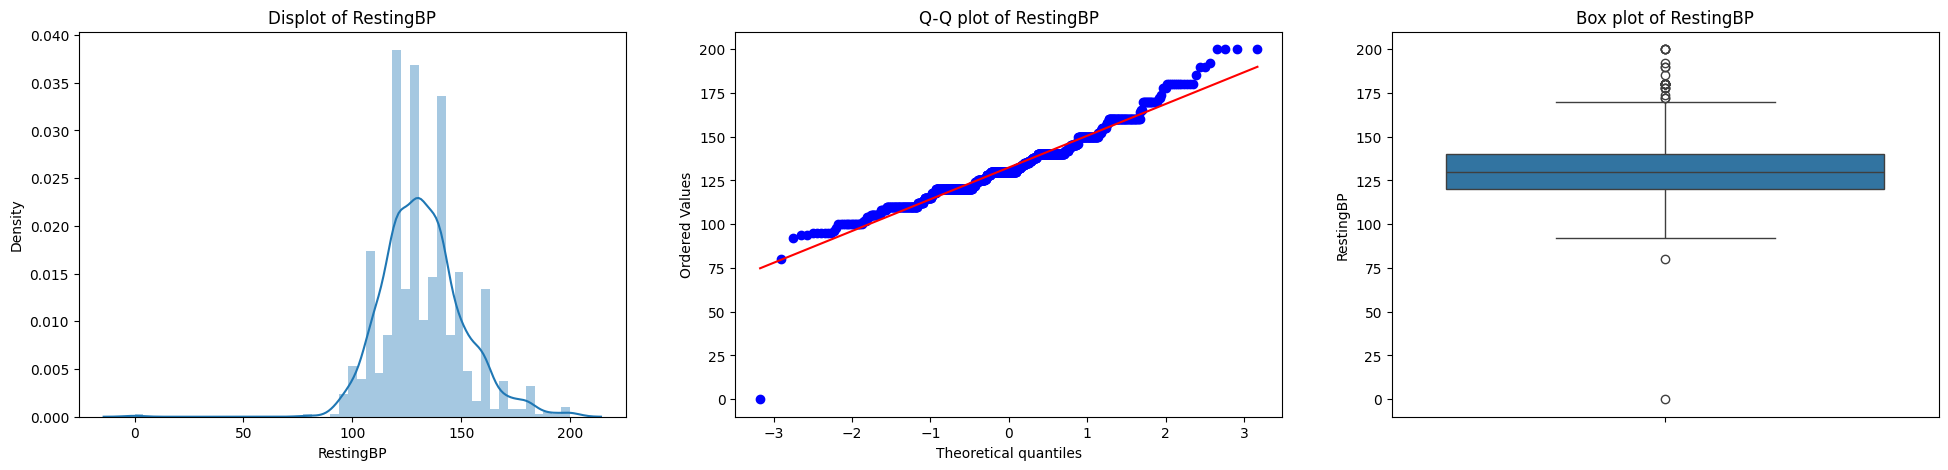

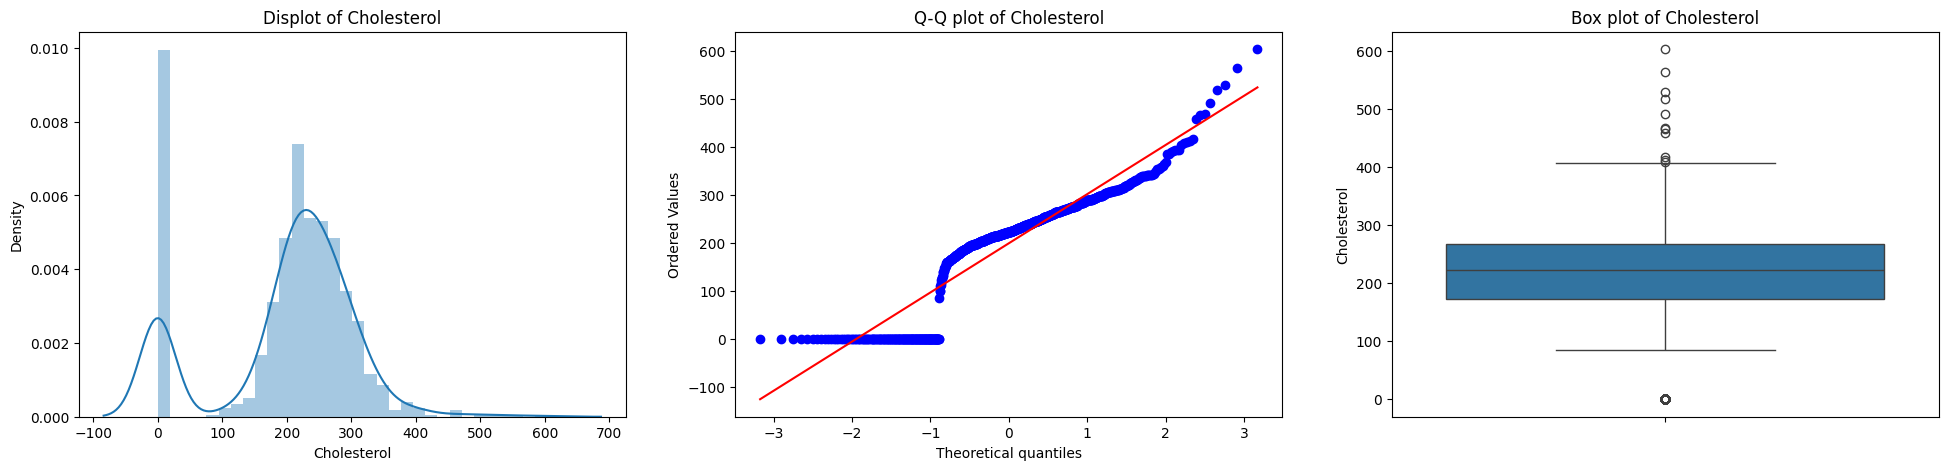

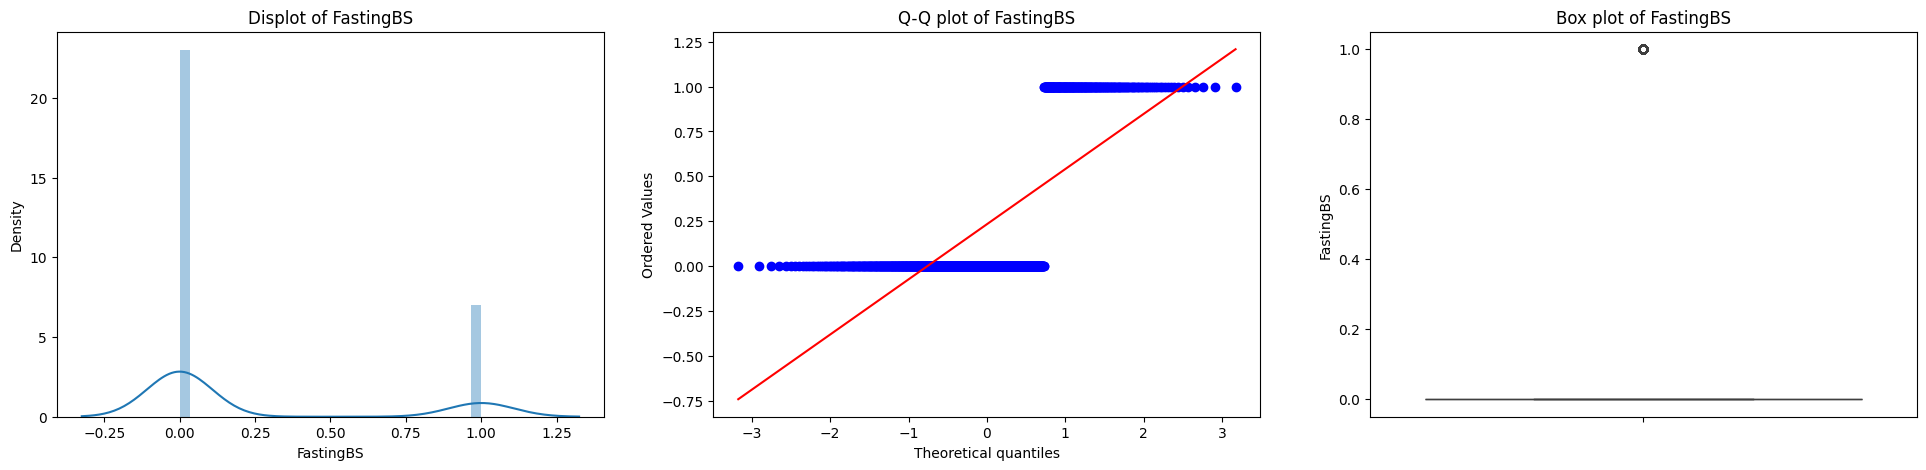

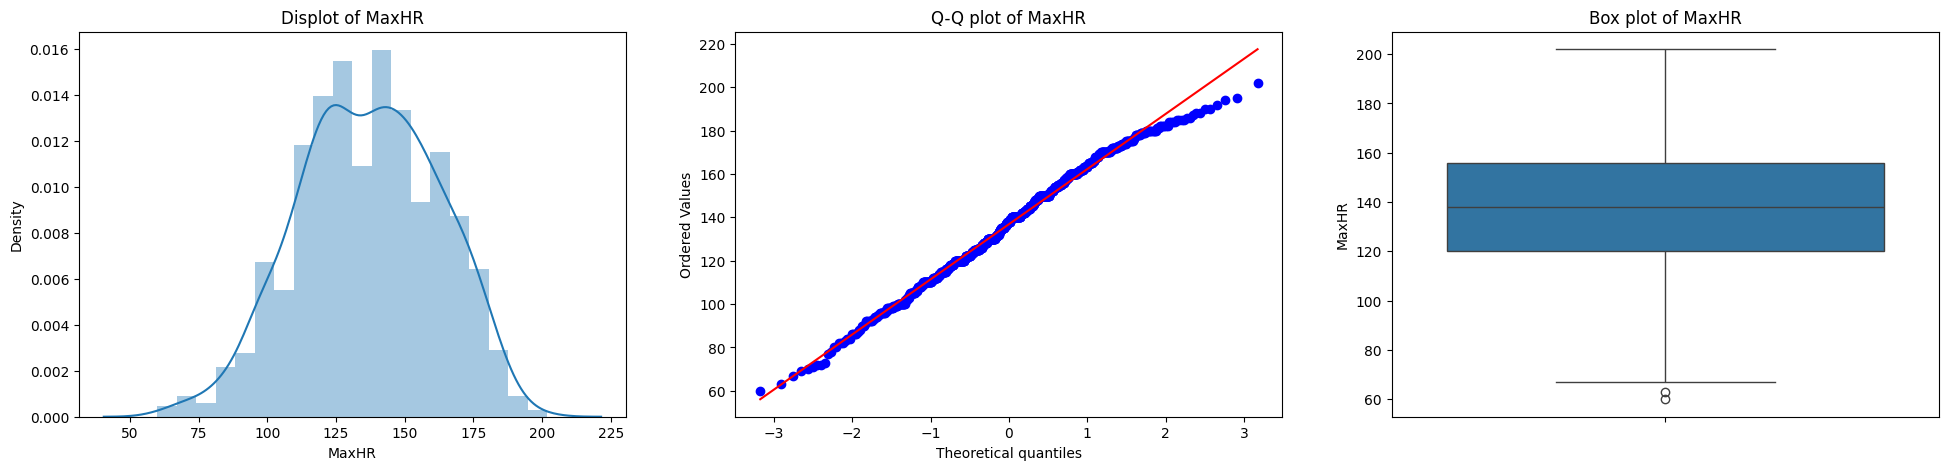

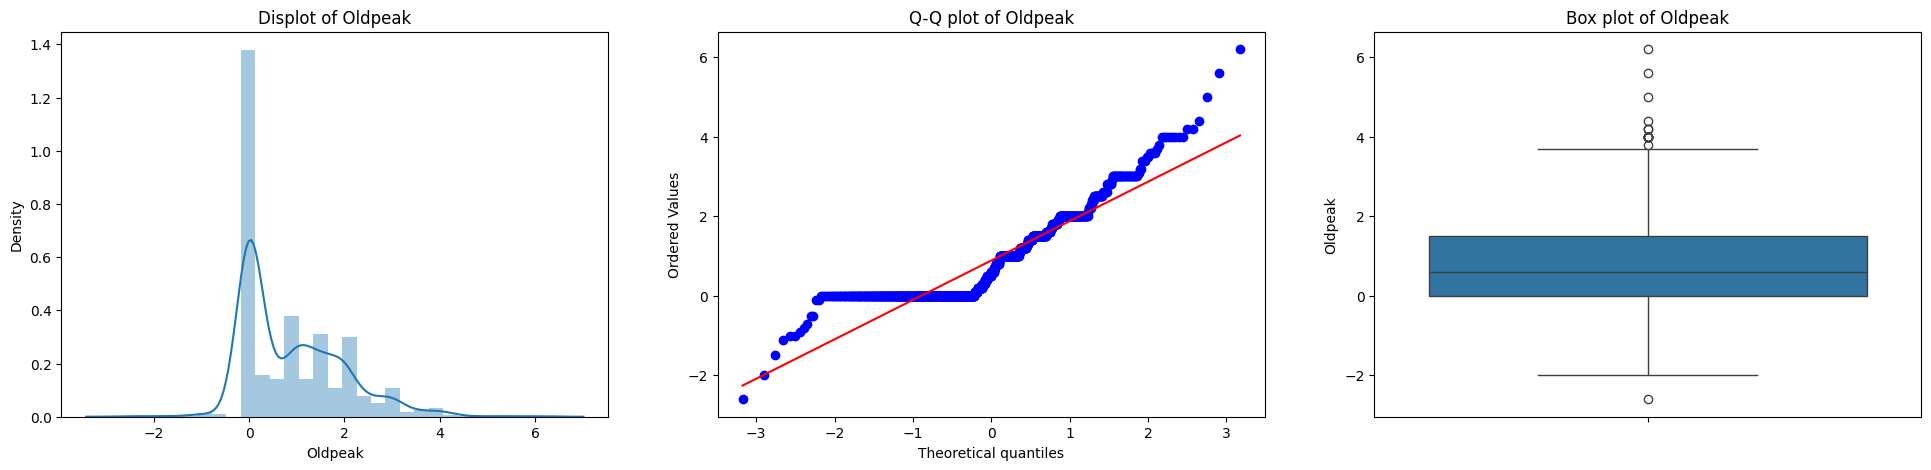

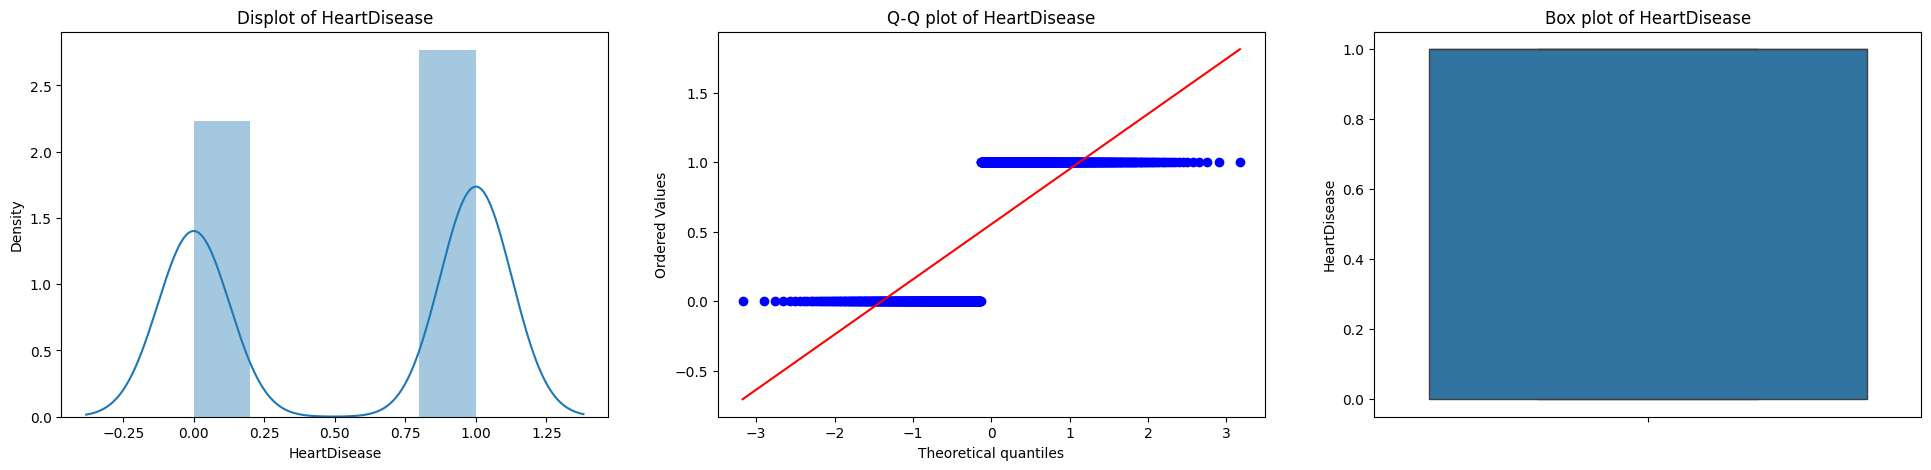

In [314]:
import scipy.stats as sts
for i in df_num_col:
  plt.figure(figsize=(24,5))
  plt.subplot(131)
  sns.distplot(df[i])
  plt.title(f'Displot of {i}')

  plt.subplot(132)
  sts.probplot(df[i],plot=plt)
  plt.title(f'Q-Q plot of {i}')

  plt.subplot(133)
  sns.boxplot(df[i])
  plt.title(f'Box plot of {i}')

Text(0.5, 1.0, 'Count Plot of ST_Slope')

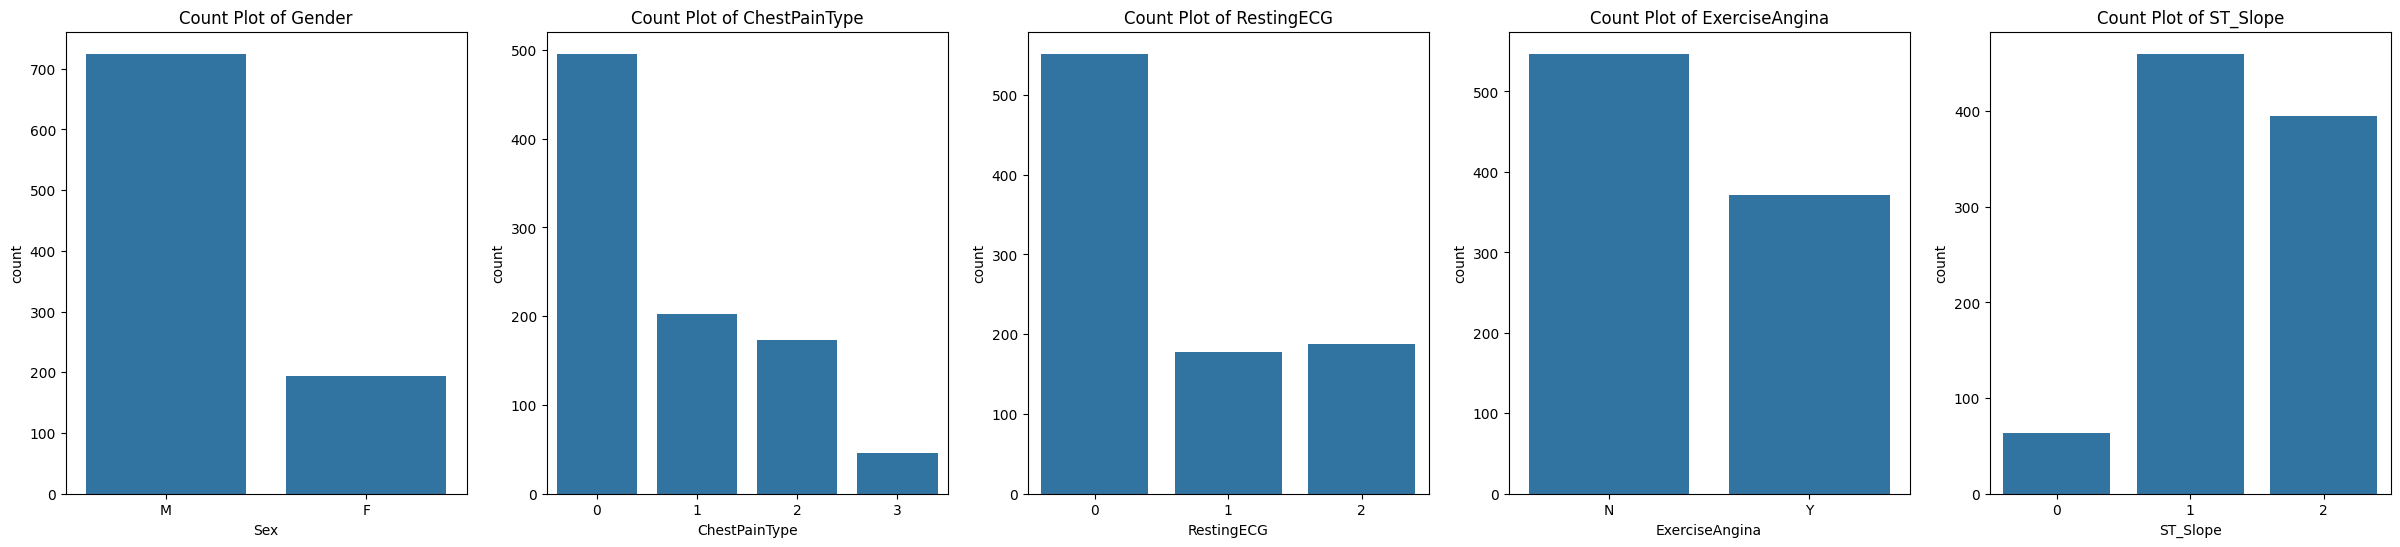

In [315]:
plt.figure(figsize=(30,6))
plt.subplot(151)
sns.countplot(df_copy,x="Sex")
plt.title("Count Plot of Gender")

plt.subplot(152)
sns.countplot(df_copy,x=df_cat_col[1])
plt.title(f"Count Plot of {df_cat_col[1]}")

plt.subplot(153)
sns.countplot(df_copy,x=df_cat_col[2])
plt.title(f"Count Plot of {df_cat_col[2]}")

plt.subplot(154)
sns.countplot(df_copy,x=df_cat_col[3])
plt.title(f"Count Plot of {df_cat_col[3]}")

plt.subplot(155)
sns.countplot(df_copy,x=df_cat_col[4])
plt.title(f"Count Plot of {df_cat_col[4]}")

Text(0.5, 1.0, 'Pie Chart of ST_Slope')

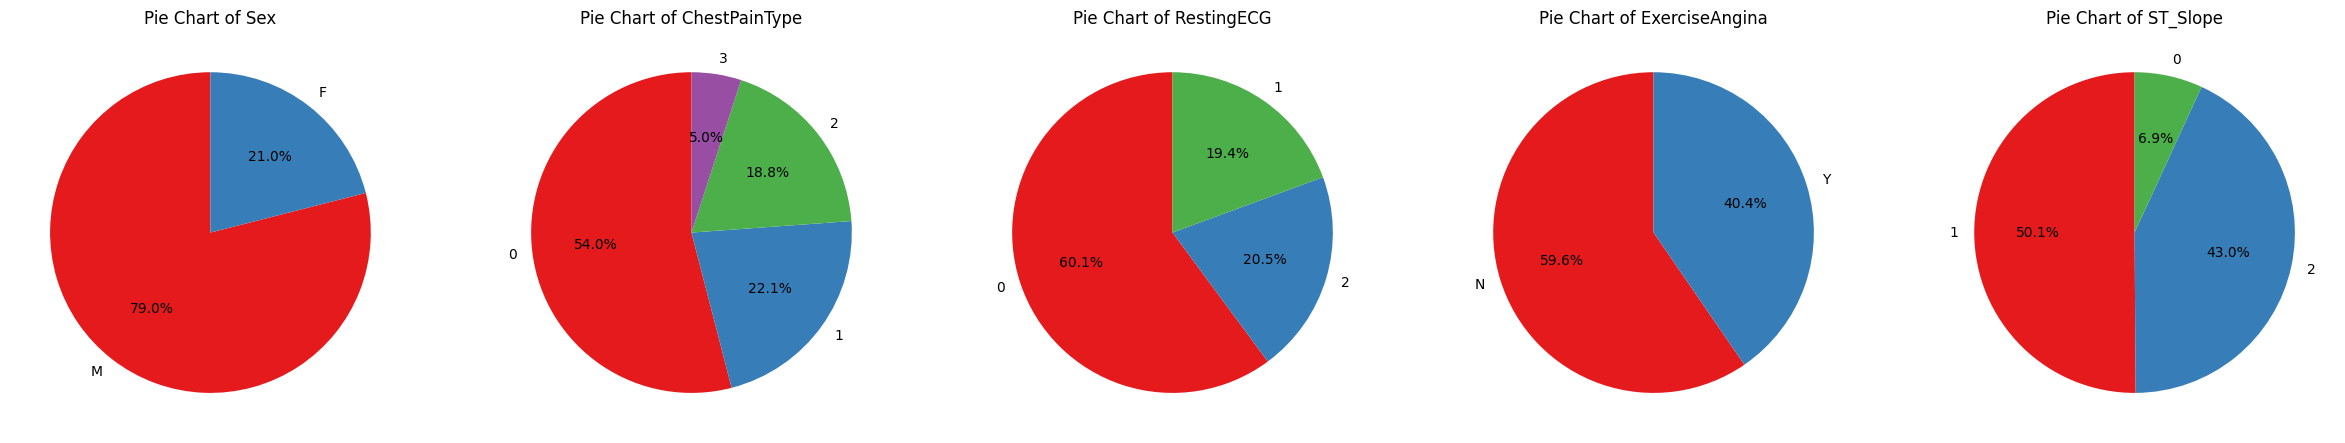

In [316]:
cat_count_Sex=df_copy[df_cat_col[0]].value_counts()
cat_count_ChestPainType=df_copy[df_cat_col[1]].value_counts()
cat_count_restingECG=df_copy[df_cat_col[2]].value_counts()
cat_count_ExerciseAngina=df_copy[df_cat_col[3]].value_counts()
cat_count_St_slope=df_copy[df_cat_col[4]].value_counts()

cat_list=[cat_count_Sex,cat_count_ChestPainType,cat_count_restingECG,cat_count_ExerciseAngina,cat_count_St_slope]
plt.figure(figsize=(30,8))
plt.subplot(151)
_=plt.pie(cat_list[0],labels=cat_list[0].index,autopct='%1.1f%%', startangle=90,colors=sns.color_palette("Set1", len(cat_list[0])))
plt.title(f"Pie Chart of {df_cat_col[0]}")

plt.subplot(152)
_=plt.pie(cat_list[1],labels=cat_list[1].index,autopct='%1.1f%%', startangle=90,colors=sns.color_palette("Set1", len(cat_list[1])))
plt.title(f"Pie Chart of {df_cat_col[1]}")

plt.subplot(153)
_=plt.pie(cat_list[2],labels=cat_list[2].index,autopct='%1.1f%%', startangle=90,colors=sns.color_palette("Set1", len(cat_list[2])))
plt.title(f"Pie Chart of {df_cat_col[2]}")

plt.subplot(154)
_=plt.pie(cat_list[3],labels=cat_list[3].index,autopct='%1.1f%%', startangle=90,colors=sns.color_palette("Set1", len(cat_list[3])))
plt.title(f"Pie Chart of {df_cat_col[3]}")

plt.subplot(155)
_=plt.pie(cat_list[4],labels=cat_list[4].index,autopct='%1.1f%%', startangle=90,colors=sns.color_palette("Set1", len(cat_list[4])))
plt.title(f"Pie Chart of {df_cat_col[4]}")

In [317]:
def remove_outlier(df,i):
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  upper_lim=Q3+1.5*IQR
  lower_lim=Q1-1.5*IQR
  print(f"{i} - Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower Limit: {lower_lim}, Upper Limit: {upper_lim}")
  df=df[(df[i]>=lower_lim) & (df[i]<=upper_lim)]
  df.reset_index(drop=True,inplace=True)
  return df

df=remove_outlier(df,"RestingBP")
df=remove_outlier(df,"Cholesterol")
df=remove_outlier(df,"Oldpeak")
df.describe()

RestingBP - Q1: 120.0, Q3: 140.0, IQR: 20.0, Lower Limit: 90.0, Upper Limit: 170.0
Cholesterol - Q1: 174.25, Q3: 265.75, IQR: 91.5, Lower Limit: 37.0, Upper Limit: 403.0
Oldpeak - Q1: 0.0, Q3: 1.5, IQR: 1.5, Lower Limit: -2.25, Upper Limit: 3.75


,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_M,ExerciseAngina_Y
count,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000
mean,52.723252,0.855920,131.544936,239.475036,0.162625,0.634807,140.573466,0.829244,1.436519,0.462197,0.760342,0.373752
std,9.542111,0.956517,15.428074,50.338211,0.369287,0.838801,24.370341,0.959398,0.581163,0.498925,0.427179,0.484144
min,28.000000,0.000000,92.000000,85.000000,0.000000,0.000000,71.000000,-0.100000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,120.000000,206.000000,0.000000,0.000000,122.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,130.000000,235.000000,0.000000,0.000000,140.000000,0.400000,1.000000,0.000000,1.000000,0.000000
75%,59.000000,2.000000,140.000000,272.000000,0.000000,1.000000,160.000000,1.500000,2.000000,1.000000,1.000000,1.000000
max,77.000000,3.000000,170.000000,394.000000,1.000000,2.000000,202.000000,3.600000,2.000000,1.000000,1.000000,1.000000


In [318]:
df.shape

(701, 12)

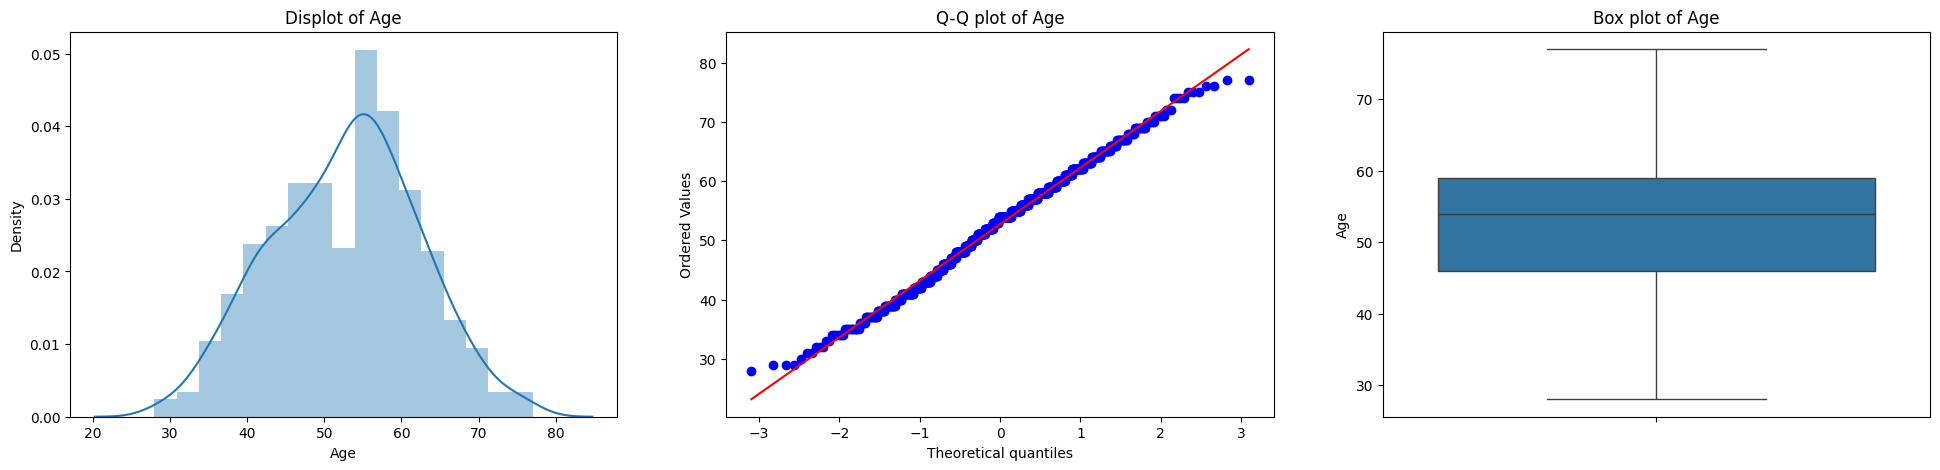

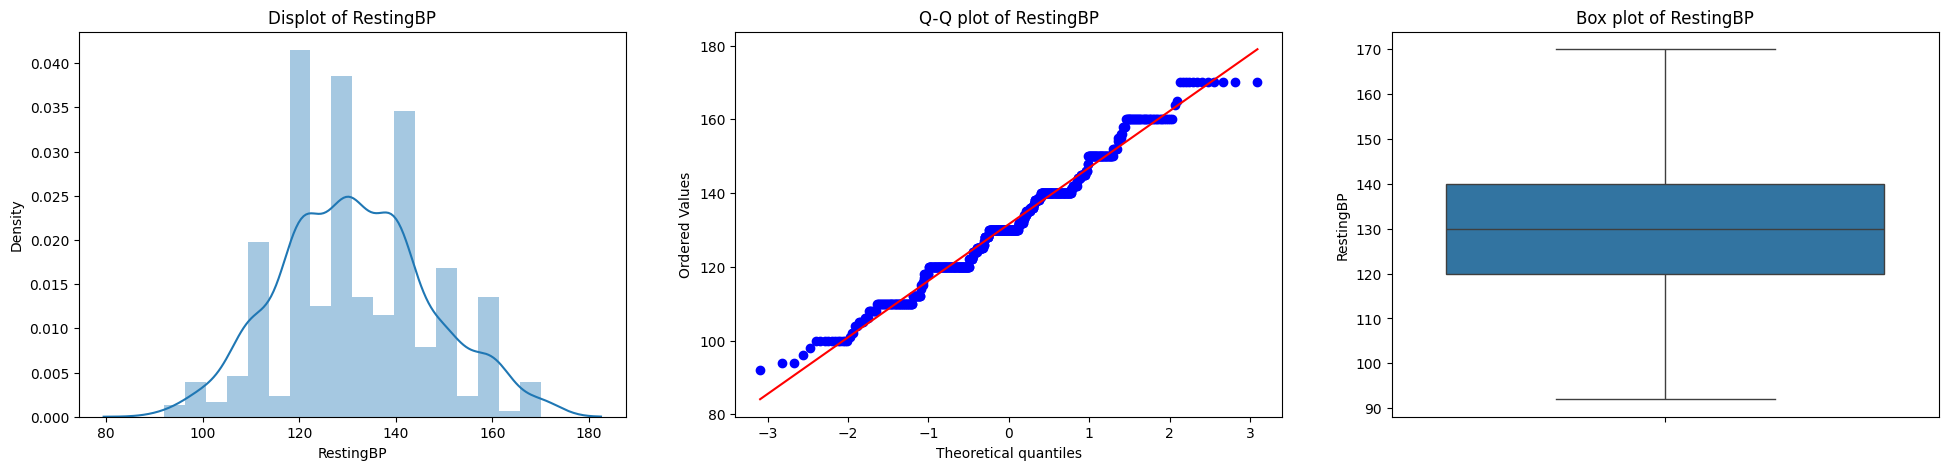

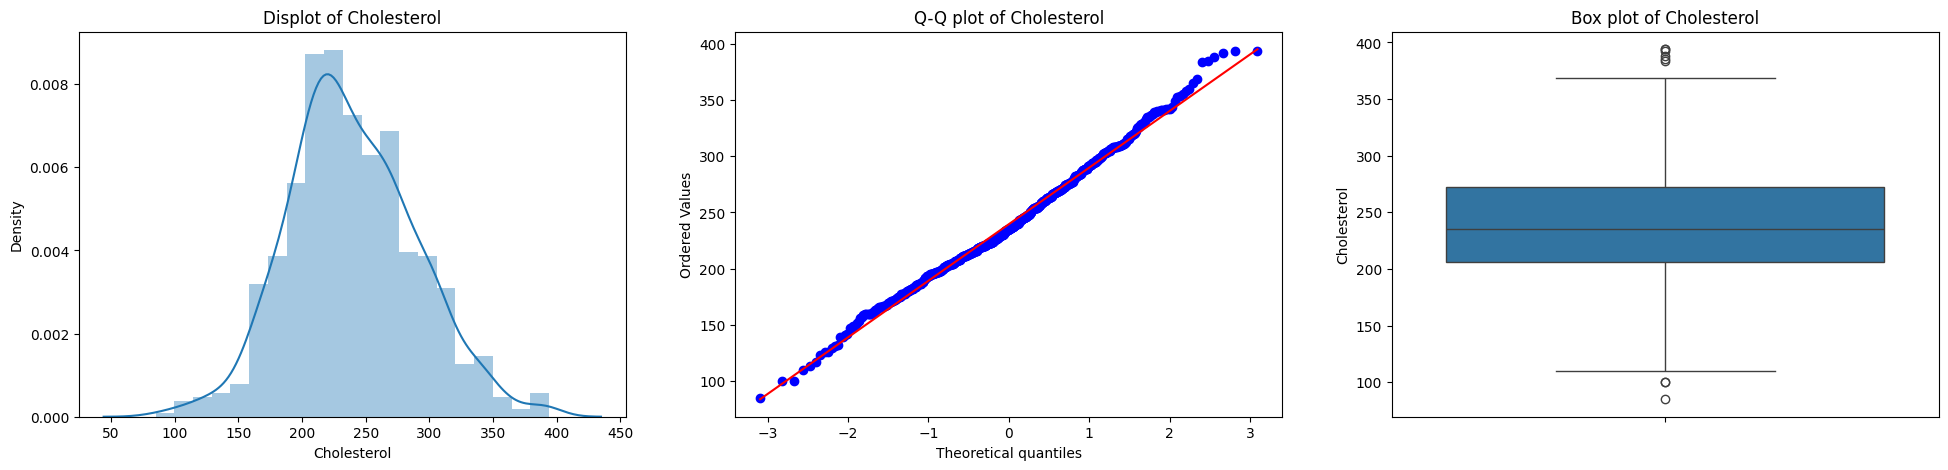

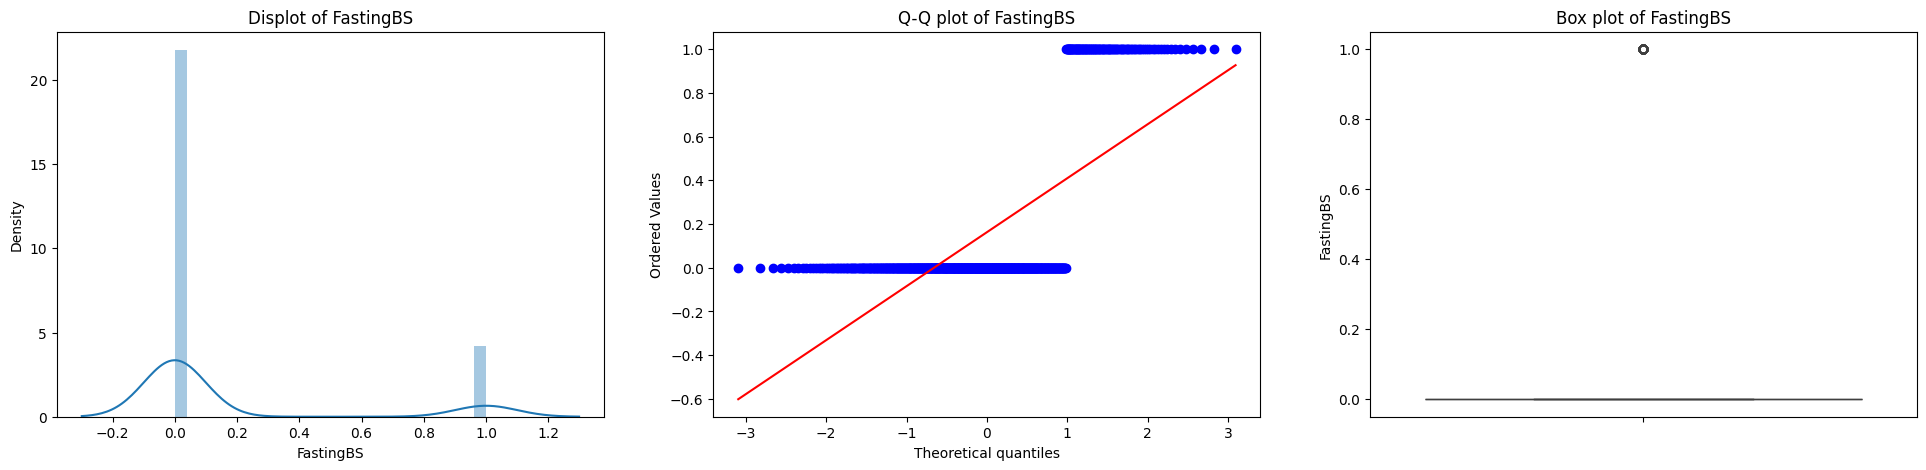

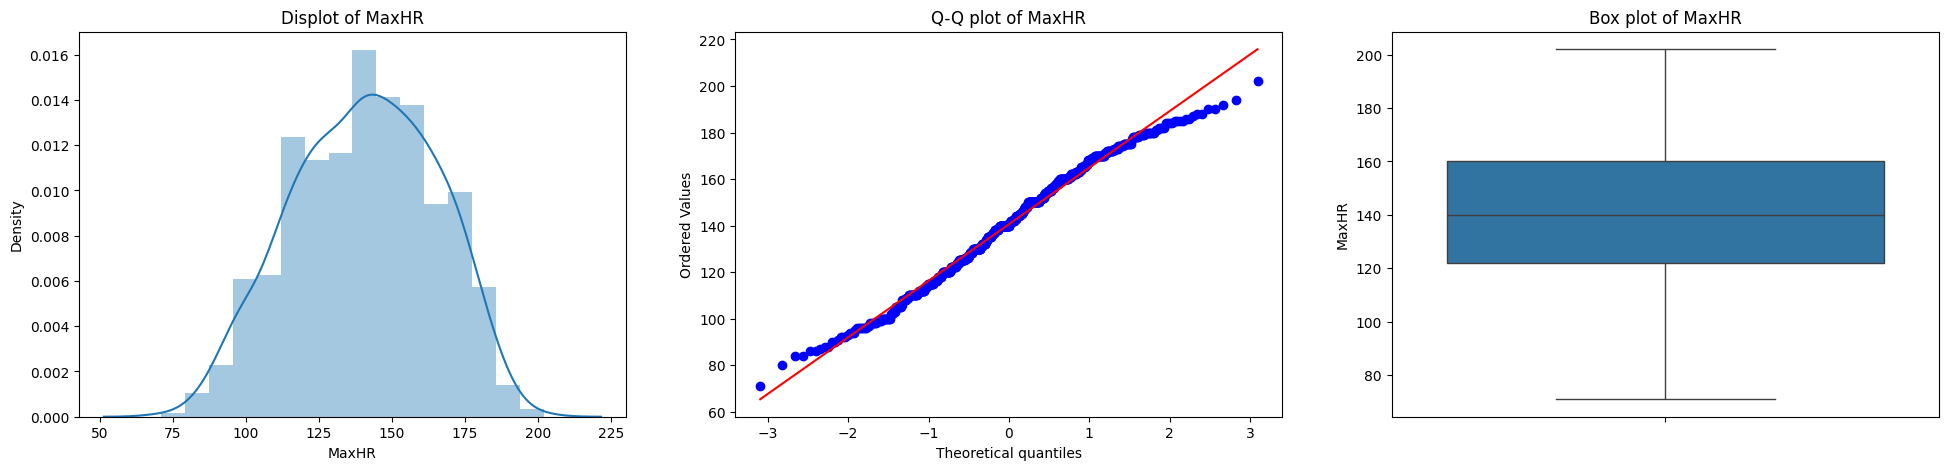

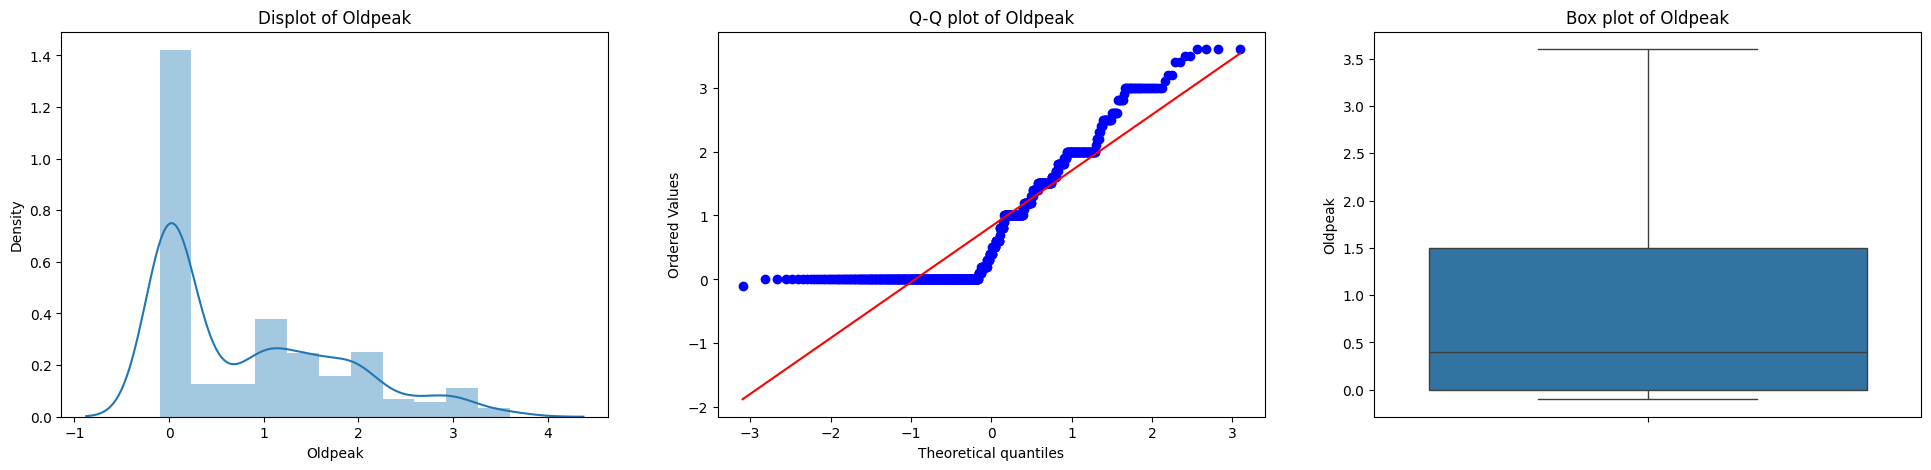

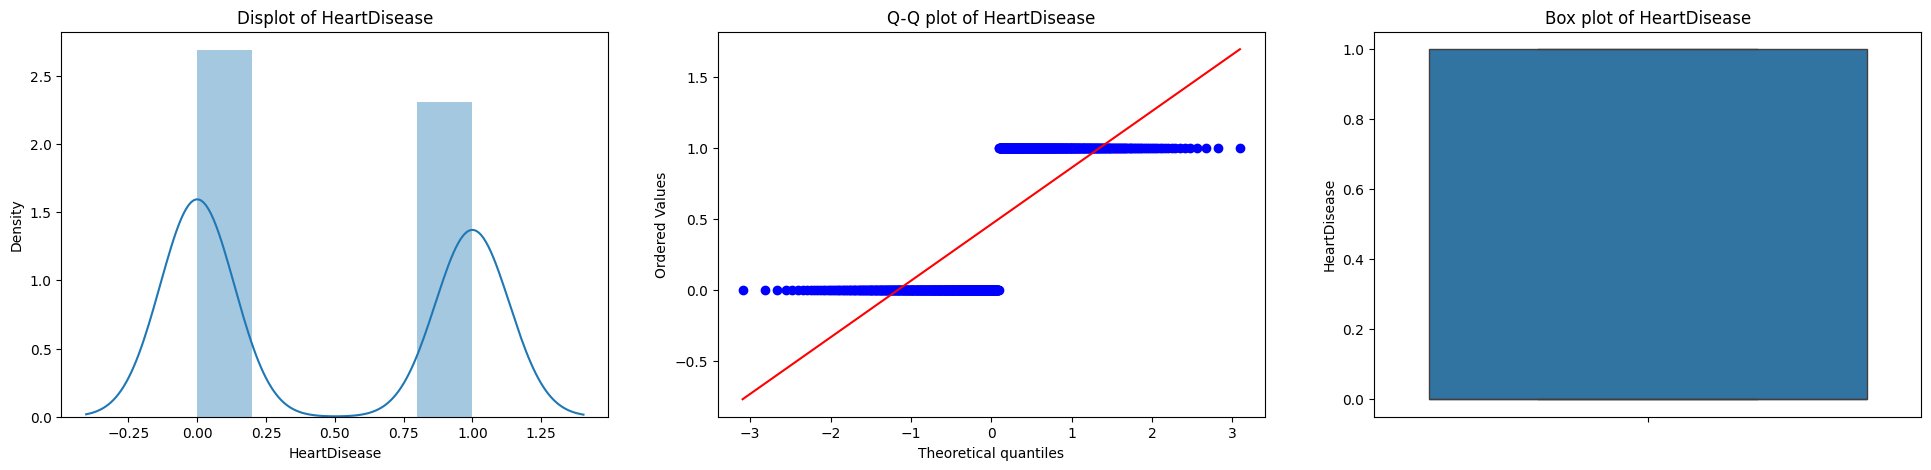

In [319]:
import scipy.stats as sts
for i in df_num_col:
  plt.figure(figsize=(24,5))
  plt.subplot(131)
  sns.distplot(df[i])
  plt.title(f'Displot of {i}')

  plt.subplot(132)
  sts.probplot(df[i],plot=plt)
  plt.title(f'Q-Q plot of {i}')

  plt.subplot(133)
  sns.boxplot(df[i])
  plt.title(f'Box plot of {i}')

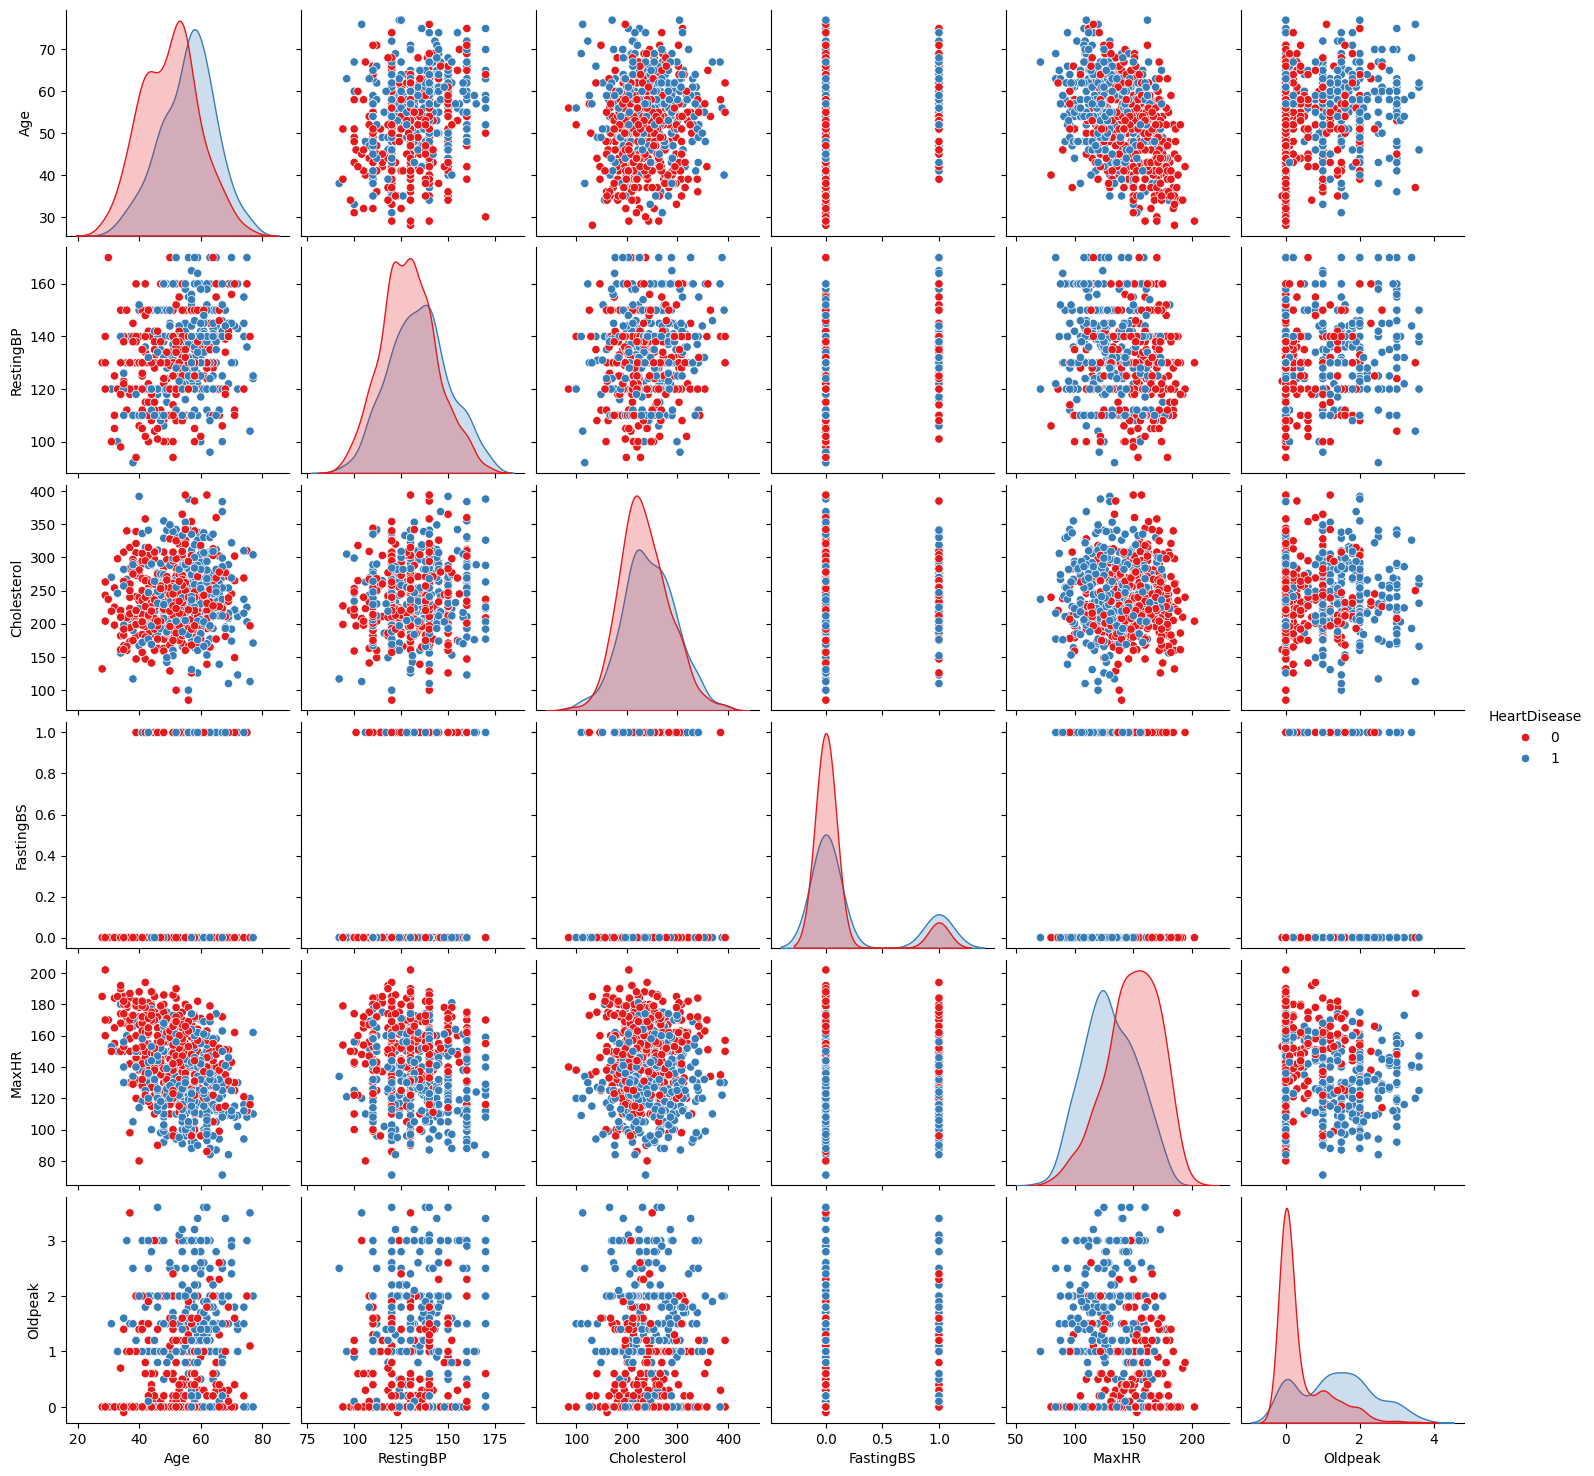

In [320]:
sns.pairplot(df[df_num_col],hue="HeartDisease",palette="Set1")

In [321]:
x=df.drop(["HeartDisease"],axis=1)
y=df.HeartDisease

In [322]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_trans=scaler.fit_transform(x)
x_trans=pd.DataFrame(x_trans,columns=x.columns)

In [323]:
from sklearn.decomposition import PCA
pca=PCA(.95)
x_pca=pca.fit_transform(x_trans)
pca.explained_variance_ratio_

array([0.27873334, 0.11865593, 0.10018711, 0.08779713, 0.08136211,
       0.07847119, 0.07183877, 0.06163236, 0.04578231, 0.04156098])

In [324]:
from sklearn.cluster import KMeans
km=KMeans()
from sklearn.model_selection import GridSearchCV
para=[{"n_clusters":[1,2],"init":["k-means++","random"],"n_init":[10,20,30,40],"max_iter":[100,200,300,400],"algorithm":['lloyd','elkan',"auto"]}]
clf=GridSearchCV(km,para,cv=5)
clf.fit(x_pca)

GridSearchCV(cv=5, estimator=KMeans(),
             param_grid=[{'algorithm': ['lloyd', 'elkan', 'auto'],
                          'init': ['k-means++', 'random'],
                          'max_iter': [100, 200, 300, 400],
                          'n_clusters': [1, 2], 'n_init': [10, 20, 30, 40]}])

In [325]:
print(f"The best Paramters are {clf.best_params_}, and \nThe best score is {round(clf.best_score_,2)}")

The best Paramters are {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 200, 'n_clusters': 2, 'n_init': 10}, and 
The best score is -1214.59


In [326]:
model=KMeans(algorithm="elkan",init="random",max_iter=300,n_clusters=2,n_init=10)
original_labels=model.fit_predict(x_pca)
label_mapping = {0: 1, 1: 0}
mapped_labels = np.vectorize(label_mapping.get)(original_labels)
df["Predicted_result"]=mapped_labels
df

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_M,ExerciseAngina_Y,Predicted_result
0,40,2,140,289,0,0,172,0.0,2,0,1.0,0.0,0
1,49,1,160,180,0,0,156,1.0,1,1,0.0,0.0,0
2,37,2,130,283,0,1,98,0.0,2,0,1.0,0.0,0
3,48,0,138,214,0,0,108,1.5,1,1,0.0,1.0,1
4,54,1,150,195,0,0,122,0.0,2,0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,45,3,110,264,0,0,132,1.2,1,1,1.0,0.0,0
697,68,0,144,193,1,0,141,3.4,1,1,1.0,0.0,1
698,57,0,130,131,0,0,115,1.2,1,1,1.0,1.0,1
699,57,2,130,236,0,2,174,0.0,1,1,0.0,0.0,0


In [327]:
y_pred=model.predict(x_pca)
print(f'The Accuracy of model is {model.inertia_}')

The Accuracy of model is 5806.276727764316


In [328]:
from sklearn.metrics import silhouette_score
silhouette = round(silhouette_score(x_pca,mapped_labels),3)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.211


In [329]:
from sklearn.metrics import calinski_harabasz_score

# Compute Calinski-Harabasz Index
ch_score = calinski_harabasz_score(x_pca,mapped_labels)
print("Calinski-Harabasz Index:", ch_score)

Calinski-Harabasz Index: 197.76122080584403


In [330]:
from sklearn.metrics import davies_bouldin_score

# Compute Davies-Bouldin Index
db_score = davies_bouldin_score(x_pca,mapped_labels)
print("Davies-Bouldin Index:", db_score)


Davies-Bouldin Index: 1.8135640974967695


<Axes: >

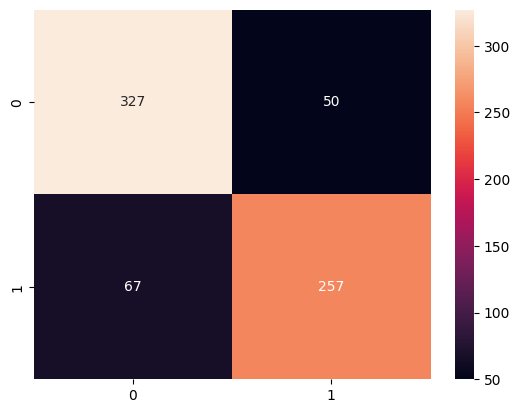

In [331]:
from sklearn.metrics import classification_report,confusion_matrix
con=confusion_matrix(y,mapped_labels)
sns.heatmap(con,annot=True,fmt="d")

In [332]:
print(classification_report(y,mapped_labels))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       377
           1       0.84      0.79      0.81       324

    accuracy                           0.83       701
   macro avg       0.83      0.83      0.83       701
weighted avg       0.83      0.83      0.83       701



In [333]:
df_pred_1=df[df["Predicted_result"]==1]
df_pred_0=df[df["Predicted_result"]==0]
df_act_1=df[df["HeartDisease"]==1]
df_act_0=df[df["HeartDisease"]==0]

In [373]:
columns=['Age','RestingBP', 'Cholesterol',
       'MaxHR', 'Oldpeak']

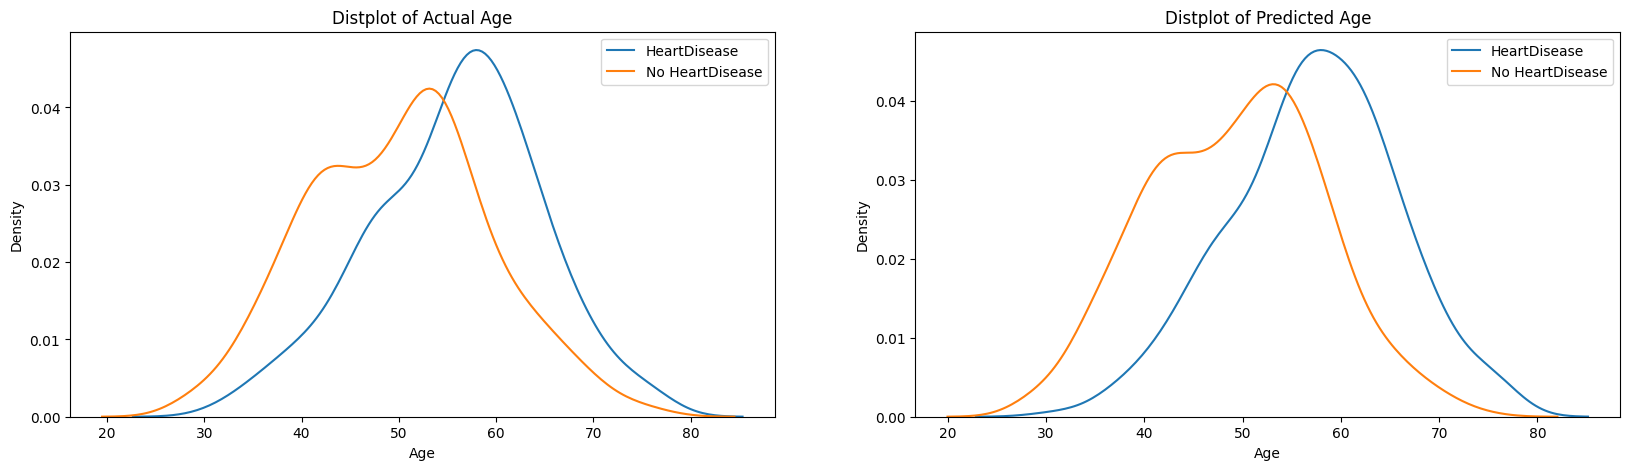

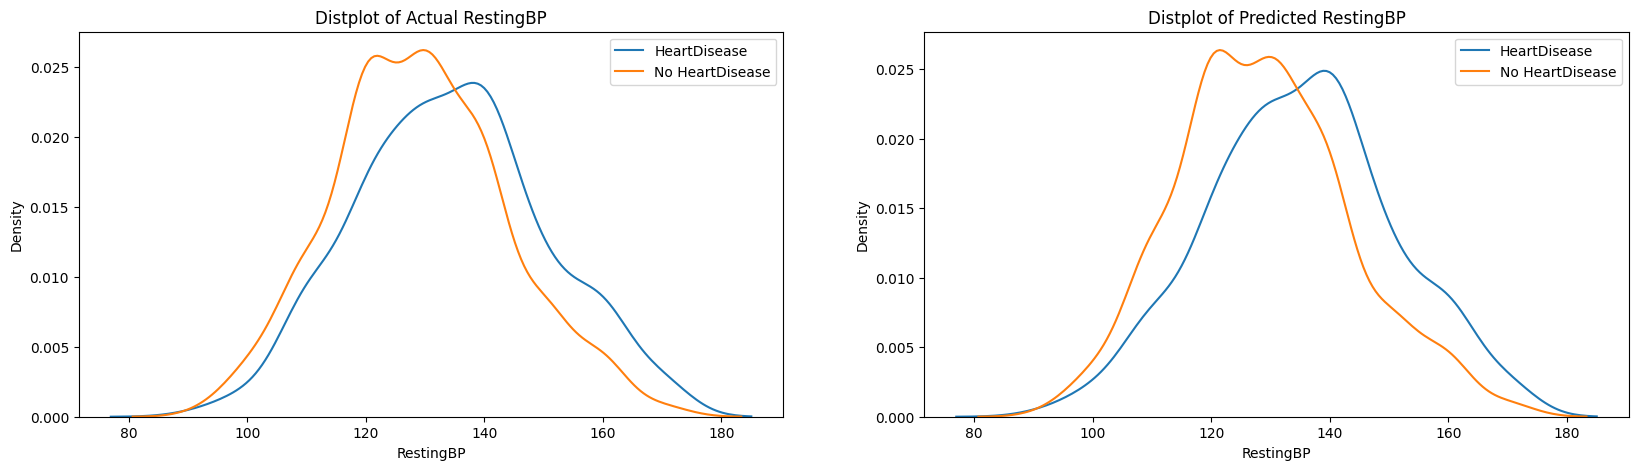

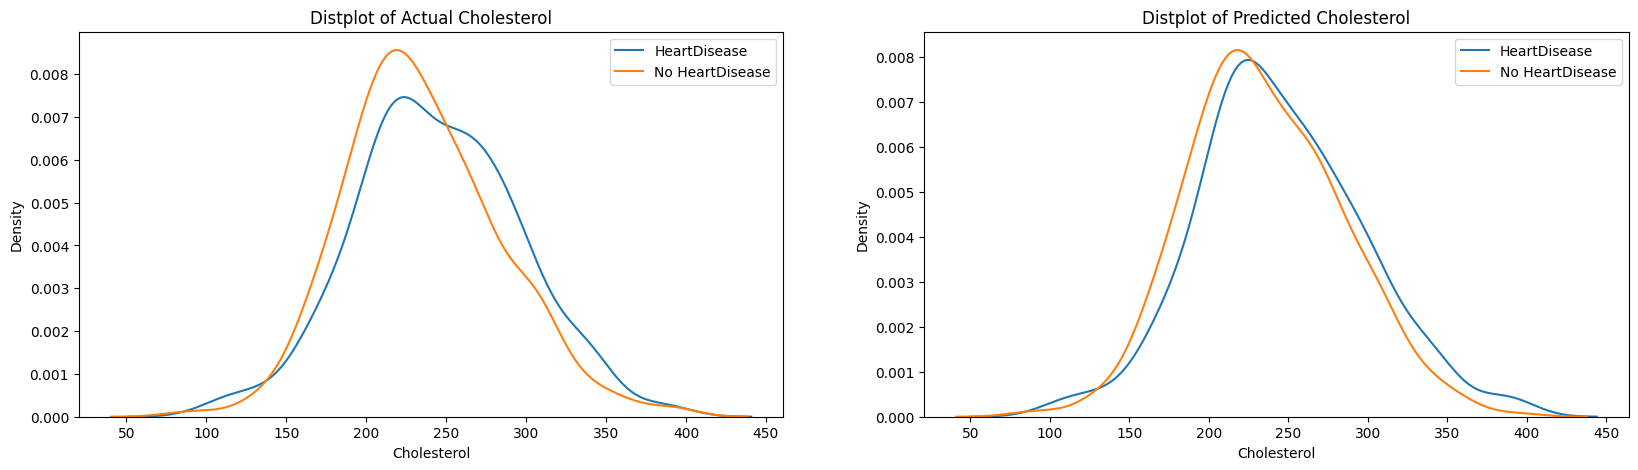

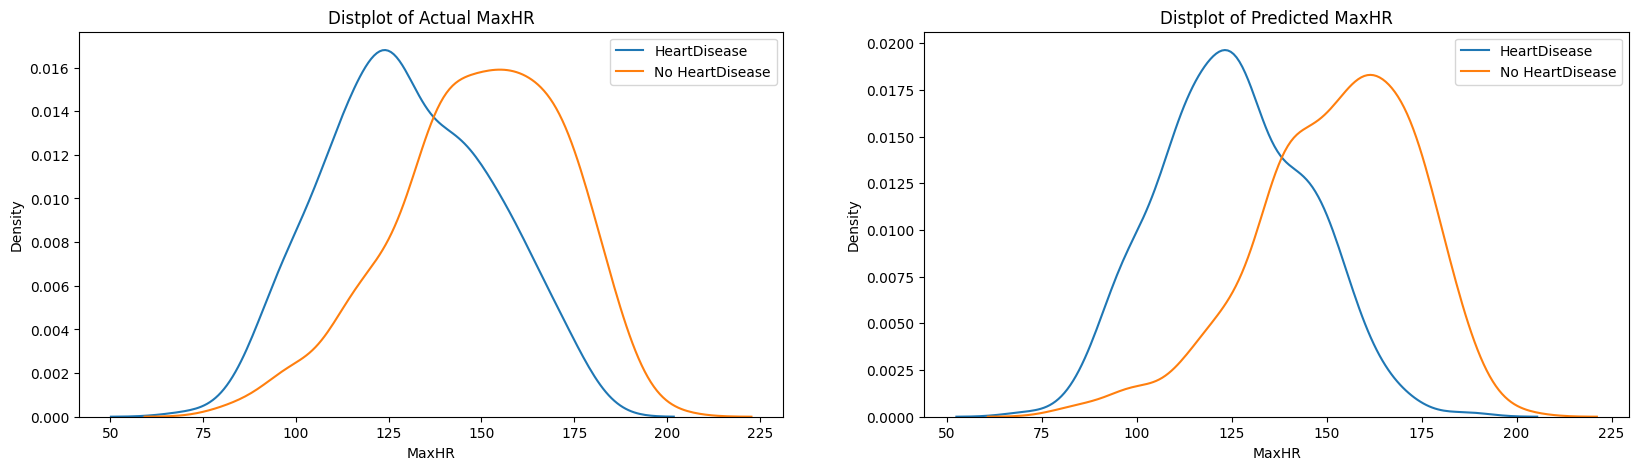

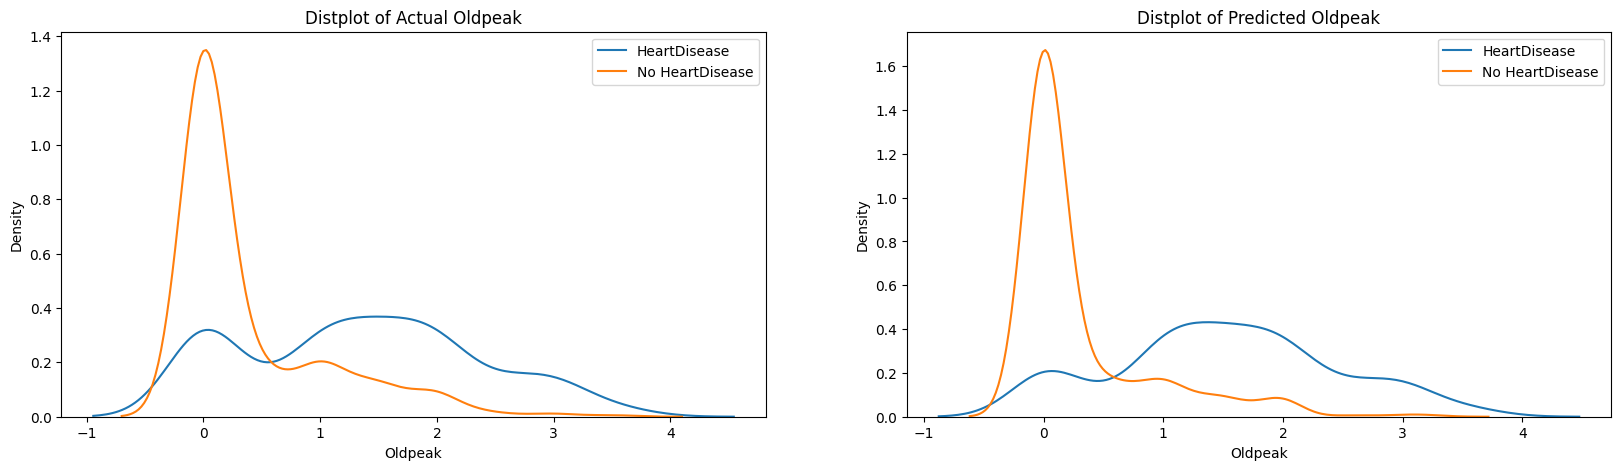

In [382]:
for i in columns:
  plt.figure(figsize=(20,5))
  plt.subplot(121)
  sns.distplot(df_act_1[i],label="HeartDisease",hist=False)
  sns.distplot(df_act_0[i],label="No HeartDisease",hist=False)
  plt.legend()
  plt.title(f"Distplot of Actual {i}")

  plt.subplot(122)
  sns.distplot(df_pred_1[i],label="HeartDisease",hist=False)
  sns.distplot(df_pred_0[i],label="No HeartDisease",hist=False)
  plt.legend()
  plt.title(f"Distplot of Predicted {i}")
  plt.show()